# This Jupyter notebook compares results from MPEC and Optimal Solution.

### Here we campare Social Welfare as system objective functions 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

### MPEC Objective Functions


In [2]:
# Model_obj_vlues_1_20221021-185407.csv
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_obj_vlues_'
append_name ="_20221021-185407"
ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    #print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path, header=None))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV


In [3]:
# Add value for Iteration 2 of each MPEC as the value for each MPEC
MPEC_OBJ = []
for df in data:
    MPEC_OBJ.append(df[df.index==2].values.flatten().tolist())

df_mpec = pd.DataFrame(MPEC_OBJ, columns = [x for x in range(24)])

df_mpec['DA']=['DA'+str(x) for x in range(1,ncda+1) ]
df_mpec['Model'] ='MPEC'

### Loading Matlab Linear code results

In [4]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
df_lin = pd.read_excel(files_name,'Objective_Function', header=None)
df_lin['Model'] = 'Optimal'
df_lin['DA'] = 'Optimal' 

## Comparing Optimal Social Welfare with MPECs

In [5]:
df_comp = pd.concat([df_mpec, df_lin])

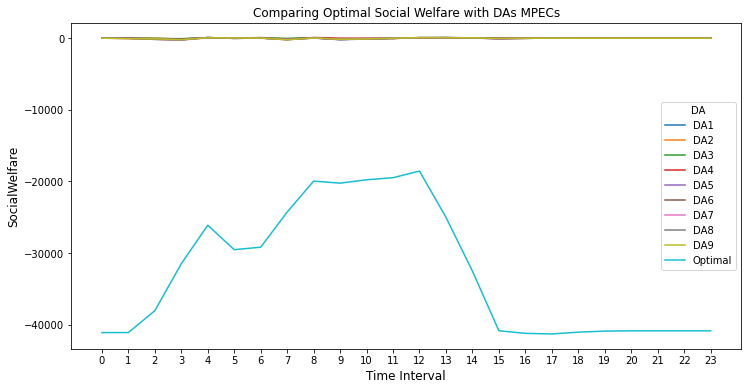

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
df_temp = df_comp.melt( id_vars=['Model','DA'],var_name='Time', value_name='SocialWelfare')
sns.lineplot(data= df_temp, x='Time', y='SocialWelfare', hue='DA')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal Social Welfare with DAs MPECs", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('SocialWelfare',fontsize=12);

This plot clearly shows big difference between opimal result and MPECs social welfare. Maybe Using EPEC can lower down such a big gap between these two results. 

## Comparing average of MPECs with Optimal

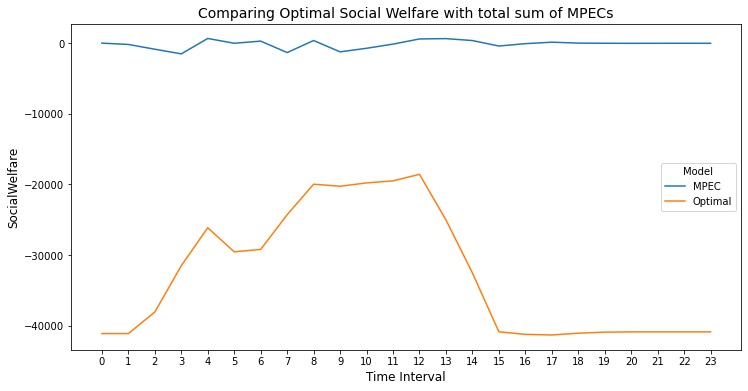

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
df_temp = df_comp.melt( id_vars=['Model','DA'],var_name='Time', value_name='SocialWelfare').groupby(['Model','Time']).sum().reset_index()
sns.lineplot(data= df_temp, x='Time', y='SocialWelfare', hue='Model')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal Social Welfare with total sum of MPECs", fontsize=14)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('SocialWelfare',fontsize=12);
fig.savefig("Optimal_vs_MPEC_Social_Welfare.png", bbox_inches='tight')